# Entregável 1 - visão computacional

Dupla: Fernando Fincatti e Laís Nascimento

In [1]:
%matplotlib inline
import cv2
from math import fabs
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

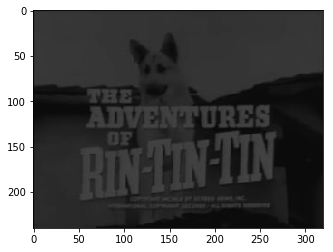

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

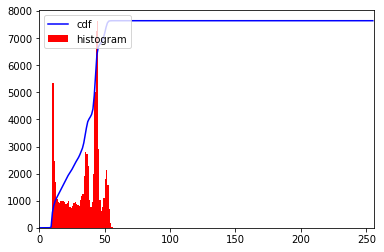

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

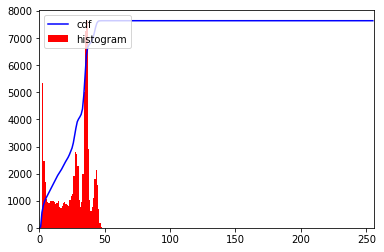

In [8]:
# Subtraindo 8 de todos os valores
menos = rintin_gray.flatten().min()
novo = rintin_gray.flatten()-menos

hist,bins = np.histogram(novo,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(novo,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [9]:
maximo = novo.max()
multiplicador = 255/maximo

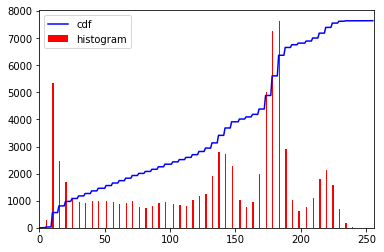

In [10]:
# Esticando o histograma
hist,bins = np.histogram(novo*multiplicador,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(novo*multiplicador,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [11]:
def scale(valor, x):
    return (valor-8)*x

In [12]:
# Imprimindo uma nova imagem
saida = rintin_gray
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = scale(rintin_gray[i][j], multiplicador)

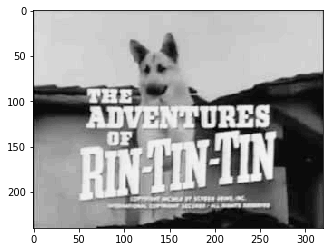

In [13]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [14]:
# Lendo a imagem
cena_canto = cv2.imread("cena_canto_sala.jpg")

In [15]:
# Transformando para RGB
cena_canto = cv2.cvtColor(cena_canto, cv2.COLOR_BGR2RGB)

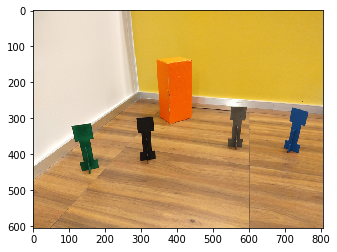

In [16]:
# Imprimindo a imagem
plt.imshow(cena_canto, cmap="Greys_r", vmin=0, vmax=255)

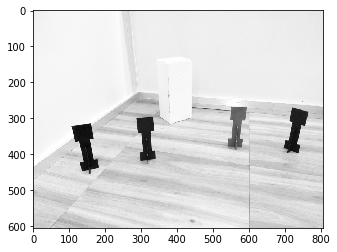

In [17]:
# Realçando o vermelho
cena_canto_R = cena_canto[:,:,0]
plt.imshow(cena_canto_R, cmap='Greys_r')

In [18]:
cena_canto_R.shape

(605, 806)

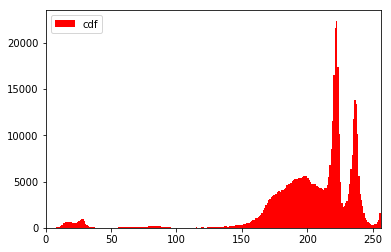

In [19]:
# Imprimindo o histograma
hist,bins = np.histogram(cena_canto_R.flatten(),256,[0,256])
plt.hist(cena_canto_R.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [20]:
# Imprimindo somente a caixa
cena_canto_B = cena_canto[:,:,2]

resultado = np.zeros((605, 806), dtype=np.uint8)

for i in range(cena_canto_R.shape[0]):
    for j in range(cena_canto_R.shape[1]):
        if cena_canto_R[i][j] > 200 and cena_canto_B[i][j] > 20:
            resultado[i][j] = 0
        elif cena_canto_R[i][j] > 200 and cena_canto_B[i][j] <= 20:
            resultado[i][j] = 255
        else:
            resultado[i][j] = 0
            

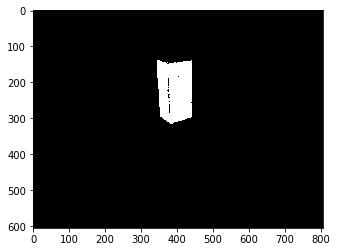

In [21]:
plt.imshow(resultado, cmap='Greys_r')

In [22]:
#Realçando o azul
cena_canto_B = cena_canto[:,:,2]

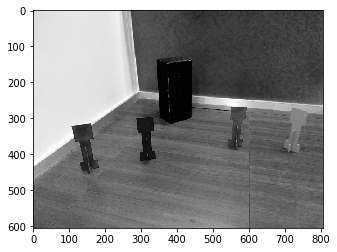

In [23]:
plt.imshow(cena_canto_B, cmap='Greys_r')

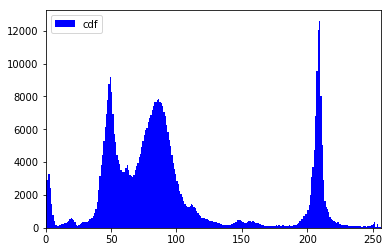

In [24]:
#Imprimindo o histograma
hist,bins = np.histogram(cena_canto_B.flatten(),256,[0,256])
plt.hist(cena_canto_B.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [25]:
# Imprimindo somente o creeper azul

resultado_1 = np.zeros((605, 806), dtype=np.uint8)

for i in range(cena_canto_B.shape[0]):
    for j in range(cena_canto_B.shape[1]):
        if cena_canto_R[i][j] > 190 and cena_canto_B[i][j] > 70:
            resultado_1[i][j] = 0
        elif cena_canto_R[i][j] < 100 and cena_canto_B[i][j] > 70:
            resultado_1[i][j] = 255
        else:
            resultado_1[i][j] = 0

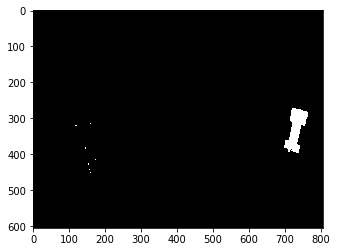

In [26]:
plt.imshow(resultado_1, cmap='Greys_r')

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [27]:
imagem = cv2.imread("hall_box_battery_atividade3.png")

In [28]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

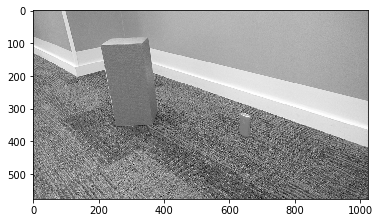

In [29]:
plt.imshow(imagem, cmap="Greys_r", vmin=0, vmax=255)

In [30]:
imagem.shape

(576, 1024)

In [31]:
# Relaçando as bordas
resposta_2 = np.zeros((576, 1024), dtype=np.uint8)

for i in range(imagem.shape[0]):
    for j in range(imagem.shape[1]):
        if j == 1023 or j == 0:
            resposta_2[i][j] = imagem[i][j]
            
        else:
            resposta_2[i][j] = fabs(int(imagem[i][j+1]) - int(imagem[i][j-1]))

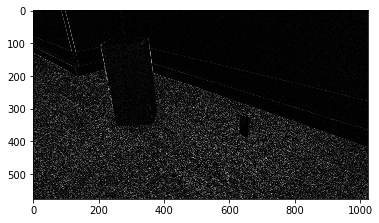

In [32]:
plt.imshow(resposta_2, cmap="Greys_r", vmin=0, vmax=255)